# Comparing similarities between Images


https://nbviewer.jupyter.org/github/Ankur-singh/image_similarity/blob/master/Image_similarity.ipynb

In [2]:
from sklearn.metrics import pairwise_distances
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.applications import VGG16


import os
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Method 1: Euclidean distance and SSIM

In [3]:
def mse(x,y): return np.sqrt(((x-y)**2).sum())/(x.shape[0])

def show_images():
    for i, img in enumerate(images):
        plt.subplot(131+i)
        plt.imshow(img/255.0)
        
def calculate_scores(images, ssim=False):
    org = images[0]
    
    for i, img in enumerate(images):
        mse_score = mse(org.flatten(), img.flatten())
        if ssim: 
            ssim_score = ssim(org, img, multichannel=True)
            label = "For image {}; MSE: {:.4f}, SSIM: {:.4f}"
            print(label.format(i, mse_score, ssim_score ))
        else:
            label = "For image {}; MSE: {:.4f}"
            print(label.format(i, mse_score))

In [4]:
path = '/home/redne/git_repos/marvel_movies/images/test/'
image_files = [(path + f) for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]
print(len(image_files))

7


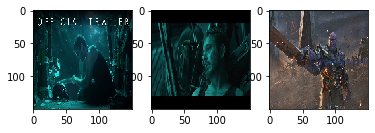

In [11]:
#image_names = ['cat1.jpg', 'cat2.png', 'cat_d.jpg']
imgs = []
for img in image_files[:3]:
    imgs.append(image.img_to_array(image.load_img(img, target_size=(150,150))))
    
images = np.array(imgs)
show_images()

In [12]:
# Lower the MSE, closer the images. 
# Higher the SSIM, closer the image. Max values of SSIM is 1
calculate_scores(images) 

For image 0; MSE: 0.0000
For image 1; MSE: 0.1799
For image 2; MSE: 0.2395


---
## Method 2: CNNs for features extraction

In [14]:
model = VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))
features = model.predict(images)
features.shape

(3, 4, 4, 512)

In [15]:
## using different distance metrics
def calculate_scores_dist(images, dist='euclidean'):
    distances = pairwise_distances(images.reshape(len(images), -1), metric= dist)[0]
    for i,d in enumerate(distances):
        print('{} for image {:.4f}; {:.4f}'.format(dist, i, d))

In [16]:
calculate_scores_dist(features)

euclidean for image 0.0000; 0.0000
euclidean for image 1.0000; 836.3589
euclidean for image 2.0000; 1146.5721


In [17]:
for d in ['cityblock', 'cosine', 'euclidean', 'l1', 'l2', 'manhattan']:
    calculate_scores_dist(features,dist=d)
    print()

cityblock for image 0.0000; 0.0000
cityblock for image 1.0000; 25432.6908
cityblock for image 2.0000; 39941.8166

cosine for image 0.0000; 0.0000
cosine for image 1.0000; 0.6661
cosine for image 2.0000; 0.7939

euclidean for image 0.0000; 0.0000
euclidean for image 1.0000; 836.3589
euclidean for image 2.0000; 1146.5721

l1 for image 0.0000; 0.0000
l1 for image 1.0000; 25432.6908
l1 for image 2.0000; 39941.8166

l2 for image 0.0000; 0.0000
l2 for image 1.0000; 836.3589
l2 for image 2.0000; 1146.5721

manhattan for image 0.0000; 0.0000
manhattan for image 1.0000; 25432.6908
manhattan for image 2.0000; 39941.8166



----
## Method 3: Going completely DL (CNNs - feature extaction & FC - classification)

